<center><h1> Validation and Learning Curves </h1></center>
***

Here we will see validation and learning curve for model. 

In [1]:
import set_jupyter_path
from sklearn.model_selection import validation_curve, learning_curve
from src.car_price_prediction.utils import df_utils, dataset_manager, model_manager
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import warnings 
warnings.filterwarnings('ignore')

In [2]:
validation_params = [1,2,3,5,10,20,30,40]
df = shuffle(dataset_manager.get_processed_dataset())
X, y = df_utils.get_data_and_target(df)
X = pd.get_dummies(X)
forest = RandomForestRegressor

In [4]:
train_scores,valid_scores = validation_curve(forest(),X,y,'n_estimators',validation_params)

Random forest works different than other models, and complexity of model doesn't make the model to overfit, the more estimators we use, more unbiased gets the estimator. So in validation curve you can see that, when using less estimators, accuracy is less too, and after some number of estimators, accuracy changes in a slow pace.

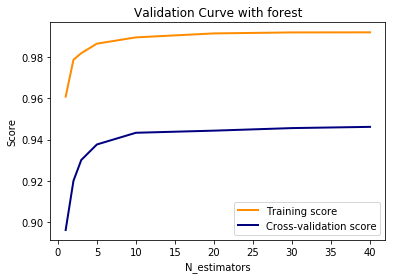

In [5]:
plt.title("Validation Curve with forest")
plt.xlabel("N_estimators")
plt.ylabel("Score")
lw = 2
plt.plot(validation_params, np.mean(train_scores,axis=1), label="Training score",
             color="darkorange", lw=lw)
plt.plot(validation_params, np.mean(valid_scores,axis=1), label="Cross-validation score",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Here, we will see the learning curve, learning curve is a plot of how model learns given range of samples to train, it usually refers to a plot of the prediction accuracy/error vs. the training set size (ie: how better does the model get at predicting the target as you increase number of instances used to train it)

In [6]:
learning_range = np.linspace(0.1,1.0,20)
train_sizes, train_scores, valid_scores = learning_curve(forest(n_estimators=10), X, y, train_sizes  = learning_range, cv=3)

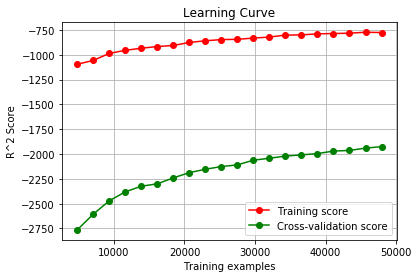

In [11]:
plt.figure()
plt.title('Learning Curve')
plt.xlabel("Training examples")
plt.ylabel("R^2 Score")
plt.grid()
plt.plot(train_sizes, np.mean(train_scores,axis=1), 'o-', color="r",label="Training score")
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', color="g",label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [6]:
learning_range = np.linspace(0.1,1.0,20)
train_sizes, train_scores, valid_scores = learning_curve(forest(n_estimators=10), X, y, 
                                                         train_sizes  = learning_range, cv=3,
                                                         scoring="neg_median_absolute_error")

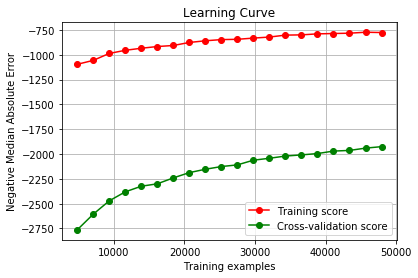

In [10]:
plt.figure()
plt.title('Learning Curve')
plt.xlabel("Training examples")
plt.ylabel("Negative Median Absolute Error")
plt.grid()
plt.plot(train_sizes, np.mean(train_scores,axis=1), 'o-', color="r",label="Training score")
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', color="g",label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [8]:
learning_range = np.linspace(0.1,1.0,20)
train_sizes, train_scores, valid_scores = learning_curve(forest(n_estimators=10), X, y, 
                                                         train_sizes  = learning_range, cv=3,
                                                         scoring="neg_mean_absolute_error")